Dataset Name:National Fertilizers Ltd (Daily stock prices 27/11/2010 to 27/11/2020)

Dataset:https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.aspx?scripcode=512289&flag=sp


In [2]:
##First Install necessary libraries packages
!pip install pmdarima 
!pip install plotly

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime
import pandas as pd

In [4]:
data=pd.read_csv('C:/Users/ANIL/Downloads/NFERT.csv',usecols=['Date','Open Price'])

In [5]:
data=data[::-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 2479 to 0
Data columns (total 2 columns):
Date          2480 non-null object
Open Price    2480 non-null float64
dtypes: float64(1), object(1)
memory usage: 38.8+ KB


We can see from info, Date column is stored as object i.e. string data type . Date column must be converted into datetime format which makes it easier for working with date and time data.

1)Here, I am using 'usecols' argument inside pd.read_csv for selecting only required column.                                   
2)'parse_date', & 'date_parser' arguments for converting Date column into datetime data type.                                   
3)inside 'parse_data, we have to pass the column to be conveted into datetime, here, it is 'Date' column.                       
4)'dateparse' function below is requied which is basically converting any argument passed to it into datetime data type . This is given to 'data_parser' inside pd.read_csv.

In [6]:
from dateutil.parser import parse
dateparse=lambda dates:parse(dates)

In [7]:
data=pd.read_csv('C:/Users/ANIL/Downloads/NFERT.csv',usecols=['Date','Open Price'],parse_dates=['Date'],date_parser=dateparse)[::-1]

In [8]:
print(data.head())
print(data.isnull().sum()) #check whether there is any null value present in data

           Date  Open Price
2479 2010-11-29       106.8
2478 2010-11-30       113.4
2477 2010-12-01       114.0
2476 2010-12-02       117.5
2475 2010-12-03       116.0
Date          0
Open Price    0
dtype: int64


## 1.Exploratory Data Analysis

In [9]:
dfidx=data.set_index('Date')
dfidx.head()

,Open Price
Date,
2010-11-29,106.8
2010-11-30,113.4
2010-12-01,114.0
2010-12-02,117.5
2010-12-03,116.0


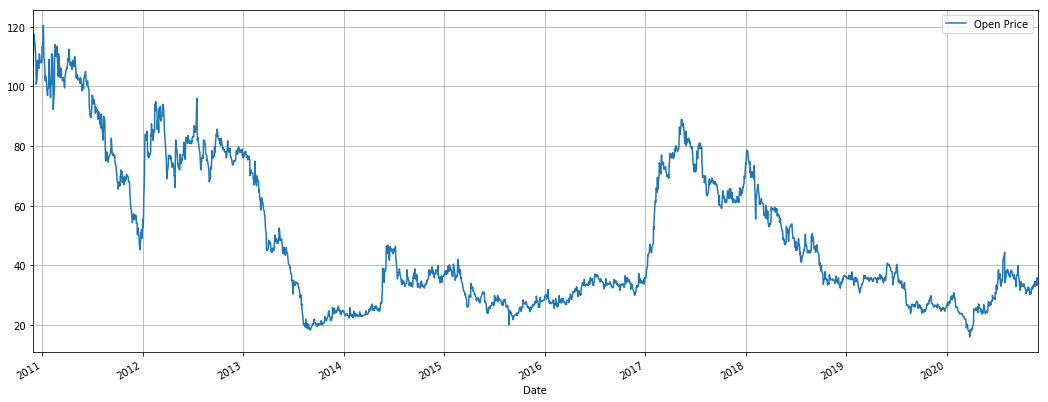

In [10]:
mpl.rcParams['figure.figsize']=(18,7)
mpl.rcParams['axes.grid']=False
dfidx.plot(grid=True)

From above plot we see that stock price is contineously decreases from 2010 to 2013.It consolidate between 20 to 40 from 2013 to 2016.Then after that long period it finally goes to 85 and again return to level 40 in nearer to 2018.Then after 2018 onwards it consolidated between 20 to 40.

## Lag plot

1)It helps to understand the autocorrelation lag, visualizing for few, normally lag greater than 4 is not useful.                2)As we increase the lag time, the correlation is decresing.                                                                   



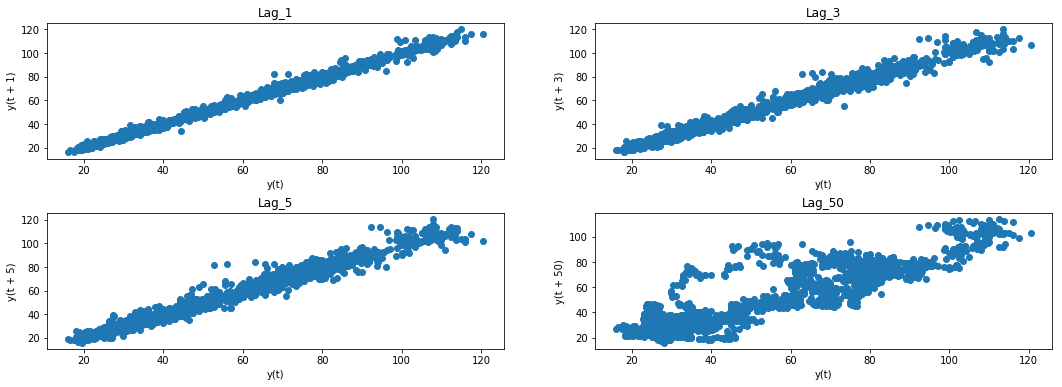

In [11]:
fig=plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
ax1=fig.add_subplot(2,2,1)
pd.plotting.lag_plot(dfidx['Open Price'],lag=1)
plt.title('Lag_1')
ax1=fig.add_subplot(2,2,2)
pd.plotting.lag_plot(dfidx['Open Price'],lag=3)
plt.title('Lag_3')
ax1=fig.add_subplot(2,2,3)
pd.plotting.lag_plot(dfidx['Open Price'],lag=5)
plt.title('Lag_5')
ax1=fig.add_subplot(2,2,4)
pd.plotting.lag_plot(dfidx['Open Price'],lag=50)
plt.title('Lag_50')
plt.show()

## 2. Ckecking Stationarity of Time Series Data                                                                                 

From the plot of data we can see that the it is not stationary, though we have to check it statistically.                            
A Time Series(TS) said to be stationary if its mean and variance is constant over time.Most of TS model works on assumption that the TS is stationary.Intuitively, we can state that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future.Also, the theories related to stationary series are more mature and easier to implement ascompared to non-stationary series. 

Two test for stationarity: ADF & KPSS test



## Dickey-Fuller test: 
If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

    Null Hypothesis - Series is not stationary
    Alternate Hypothesis - Series is stationary


In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
data_series=dfidx['Open Price']

In [14]:
print('Results of Dickey-Fuller Test:')
dftest=adfuller(data_series,autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
if dfoutput['Test Statistic']<dfoutput['Critical Value (5%)']:## Comparing with 5% significant Level
    print('Series is stationary')
else:
    print('Series is not Stationary')

Results of Dickey-Fuller Test:
Test Statistic                   -2.376951
p-value                           0.148348
#Lags Used                       13.000000
Number of Observations Used    2466.000000
Critical Value (1%)              -3.433005
Critical Value (5%)              -2.862713
Critical Value (10%)             -2.567394
dtype: float64
Series is not Stationary


## KPSS test:

    Null hypothesis - Series is stationary
    Alternate hypothesis - Series is not stationary

In [15]:
from statsmodels.tsa.stattools import kpss

In [18]:
stats,p,lags,critical_values=kpss(data_series,'c')
print(f'Test Statistics:{stats}')
print(f'p-value:{p}')
print(f'Critial Values:{critical_values}')
if p<0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics:2.9119689372194832
p-value:0.01
Critial Values:{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not Stationary


C:\Users\ANIL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


## Making a Time Series Stationary:
1)Differencing:
In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

     yt' = yt – y(t-5)
     
where yt is the value at a time t


2)Transformation:Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. Let’s do a quick log transform and differencing on dataset: 

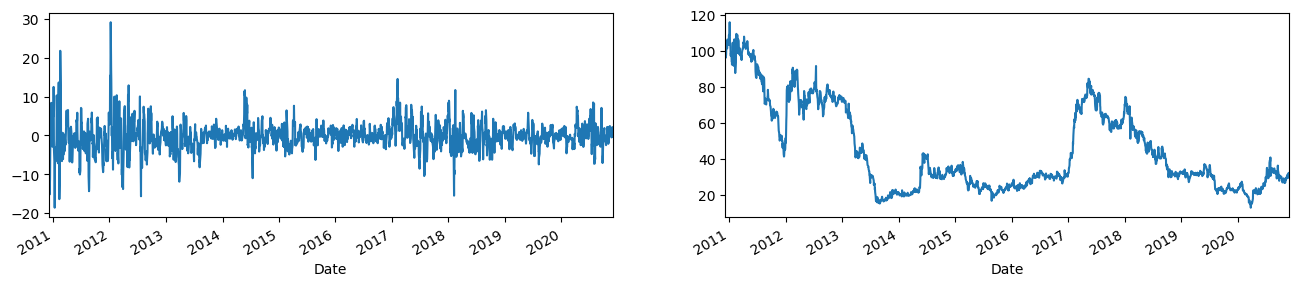

In [19]:
diff=data_series-data_series.shift(5)
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
diff.dropna().plot(ax=axes[0])
dfidx['Price_log'] = np.log(dfidx['Open Price'])
dfidx['Price_log_diff'] = dfidx['Open Price']- dfidx['Price_log'].shift(7)
dfidx['Price_log_diff'].dropna().plot(ax=axes[1])


As you can see,that first is giving significant result then second one.Hence we use differencing Method to make series Staionary.

## 3. Modelling Time Series:

There are many ways to model a time series in order to make predictions.As follows

    i)Different Moving Averages
    ii)Exponential Smoothing
    iii)ARIMA
    iv)SARIMA

## Rolling Statistics:
We can plot the moving average or moving variance and see if it varies with time.
## Simple moving average = (t + (t-1) + (t-2) + ... + (t-n)) / n

Text(0.5, 1.0, 'Simple Moving Average & Standard Deviation')

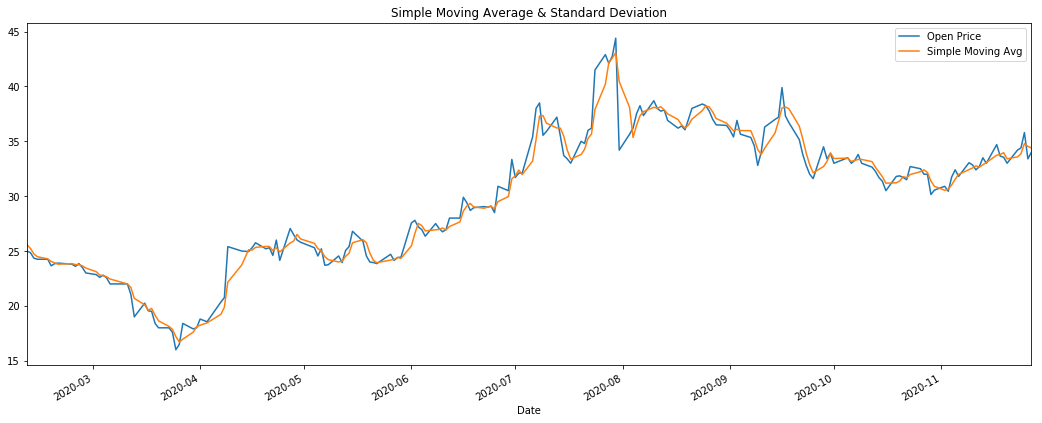

In [20]:
dfidx['Open Price'][2280:].plot()
dfidx['Open Price'].rolling(3).mean()[2280:].plot(label='Simple Moving Avg')
plt.legend()
plt.title('Simple Moving Average & Standard Deviation')

## Weighted moving average
Weighted moving average = (tweighting factor) + ((t-1)weighting factor-1) + ((t-n) *weighting factor-n)/n
This is similar as simple Moving average except, we multiply with weighting factor so that more weight is given to recent data.


In [21]:
## Making a function for calculating weighted average which is passed through.apply()
def wma(weights):
    def calc(x):
        return(weights*x).mean()
    return calc

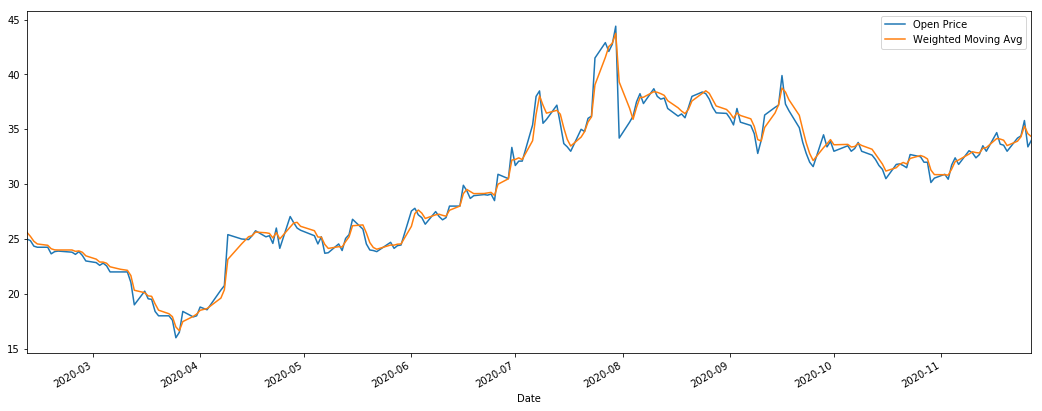

In [22]:
dfidx['Open Price'][2280:].plot()
dfidx['Open Price'].rolling(3).apply(wma(np.array([0.52,1,1.5])),raw=False)[2280:].plot(label='Weighted Moving Avg')
# Here inside wma 3 weights are passed since we are taking 3 time step only as window.
plt.legend()

## Exponential moving average\Exponential Smoothing
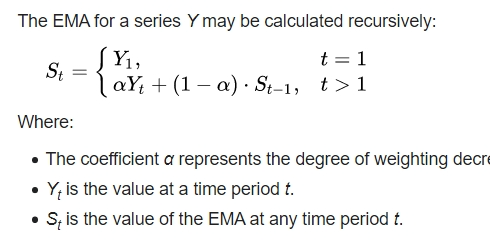



SES is a good choice for forecasting data with no clear trend or seasonal pattern. Forecasts are calculated using weighted averages, which means the largest weights are associated with most recent observations, while the smallest weights are associated with the oldest observations:

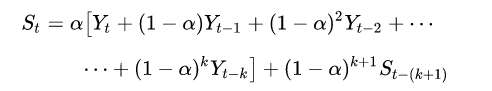

where 0≤ α ≤1 is the smoothing parameter.

The weights decrease rate is controlled by the smoothing parameter α. If α is large (i.e., close to 1), more weight is given to the more recent observations. There are 2 extreme cases:

    i)α=0: the forecasts of all future values are equal to the average (or “mean”) of the historical data, which is called    Average method.
    ii)α=1: simply set all forecasts to be the value of the last observation, which is called Naive method in statistics.
Here we run three variants of simple exponential smoothing:
     
     In fit3, we use the auto-optimization that allow statsmodels to automatically find an optimized value for us. 

In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

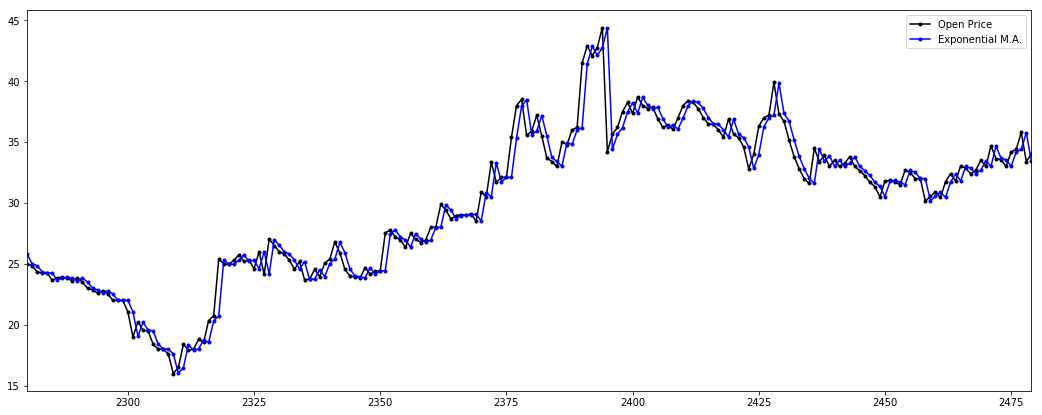

0.9785209864940629


In [24]:
DI=data.reset_index()
# Simple Exponential Smoothing
DI['Open Price'][2280:].plot(marker='.',color='black')
fit3 = SimpleExpSmoothing(DI['Open Price'].dropna()).fit()
alpha = fit3.model.params['smoothing_level']
# plot
fit3.fittedvalues[2280:].plot(marker='.',color='blue',label='Exponential M.A.') # Checking for only last 200 data points
plt.legend()
plt.show()
print(alpha)

In [25]:
diff_data_A=data.reset_index().copy()
diff_data_A['S.M.A.']= diff_data_A['Open Price'].rolling(3).mean()
diff_data_A['W.M.A.']= diff_data_A['Open Price'].rolling(3).apply(wma(np.array([0.5,1,1.5])),raw=False)
diff_data_A['E.M.A.']= pd.DataFrame(fit3.fittedvalues)
diff_data_A.dropna().head()

,index,Date,Open Price,S.M.A.,W.M.A.,E.M.A.
2,2477,2010-12-01,114.0,111.400000,112.600000,113.258304
3,2476,2010-12-02,117.5,114.966667,115.650000,113.984069
4,2475,2010-12-03,116.0,115.833333,116.166667,117.424481
5,2474,2010-12-06,113.7,115.733333,115.100000,116.030596
6,2473,2010-12-07,112.6,114.100000,113.533333,113.750059


## Making a function for comparing RMSE in all above modelling

     We can see Weighted Moving average has lowest RMSE.

In [26]:
def RMSE(df):
    SMA_RMSE=np.sqrt(np.sum((df.iloc[:,2]-df.iloc[:,3])**2))
    WMA_RMSE=np.sqrt(np.sum((df.iloc[:,2]-df.iloc[:,4])**2))
    EMA_RMSE=np.sqrt(np.sum((df.iloc[:,2]-df.iloc[:,5])**2))
    return {'Simple Moving Average':SMA_RMSE,'Weighted Moving Average':WMA_RMSE,'Exponential Moving Average':EMA_RMSE}

RMSE(diff_data_A.dropna())

{'Simple Moving Average': 60.25936533943153,
 'Weighted Moving Average': 42.68913145572822,
 'Exponential Moving Average': 81.48104713378113}

In above we can see that Weighted Moving Average has lowest Root Mean Square error.Hence we may use these for forecasting

## 4. Decomposing a Time Series Data

The components of Time Series defined as follows:

    Level: The average value in the series.
    Trend: long-term upward or downward movement..
    Seasonality: The repeating short-term cycle in the series.
    Noise: The random variation in the series.
    
So a time series is thought to be an combination of these four components. All series have a level and noise. The trend and seasonality components are optional. It is helpful to think of the components as combining either additively or multiplicatively as givenby relation below:

    y(t) = Level + Trend + Seasonality + Noise
    y(t) = Level*Trend*Seasonality * Noise
    
Since our data is non stationary we will use Multiplicative decomposition

In [27]:
#Multiplicative Decompostion
from statsmodels.tsa.seasonal import seasonal_decompose

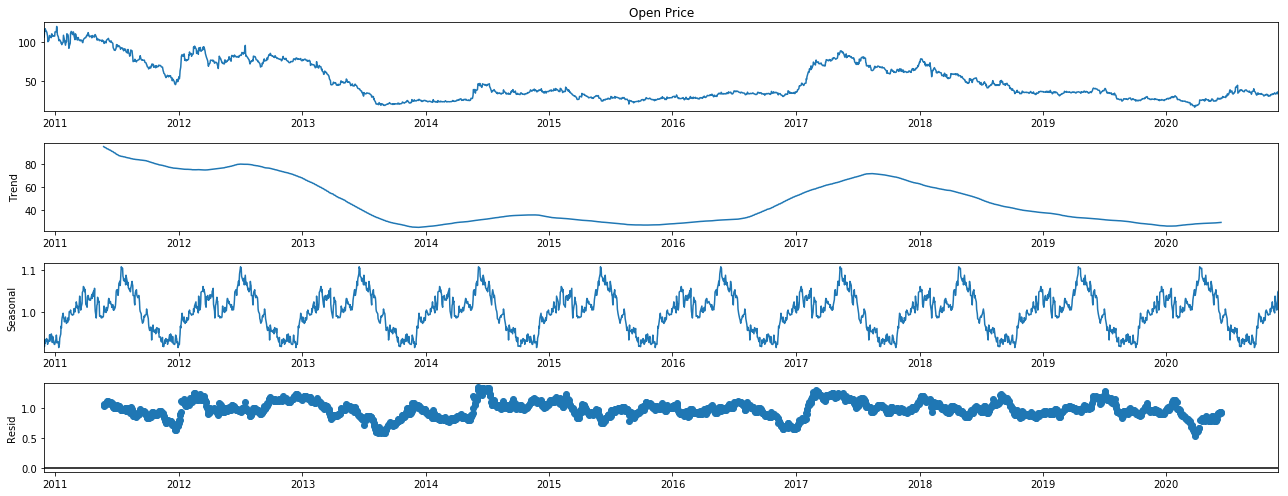

In [29]:
result=seasonal_decompose(dfidx['Open Price'],model='multiplicative',period=20*12)
result.plot()
plt.show()

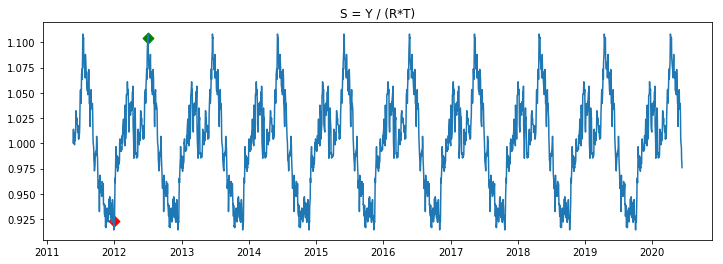

In [30]:
seasonal_comp=dfidx['Open Price']/(result.trend*result.resid.dropna())
plt.figure(figsize=(12,4))
plt.plot(seasonal_comp.dropna())
plt.scatter(x='2012-01-02', y=seasonal_comp.loc['2012-01-02'], marker='D', s=60, color='r')
plt.scatter(x='2012-07-04', y=seasonal_comp.loc['2012-07-04'], marker='D', s=60, color='g')
plt.title('S = Y / (R*T)')
plt.show()

    1)In above seasonal plot we see that when y=0.925(red marker) means there were 7.5% decrease in stock price in Jan-2012. In other words,January has a seasonal effect of -7.5%.                                                                             2)On the other hand, y=1.1(green marker) in Aug-2012 shows a 10% increase in stock price.                                       3)Hence we say if we Buy stock of National Fertilizer LTD in month of jaunary and Sell in month of August then we get approximatly 18% return just in 7-month                                                                        

## 5. Autocorrelation plot

    1)We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case,we can use  the Pearson’s correlation coefficient to summarize the correlation between the variables.
    2)The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.
    3)We can calculate the correlation for time series observations with observations with previous time steps,called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.
    4)A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronymACF. This plot is sometimes called a correlogram or an autocorrelation plot.
    5)This helps us to find if current value depends on previous values. In the plot you can observe that current value is dependent on previous 220-240 values.

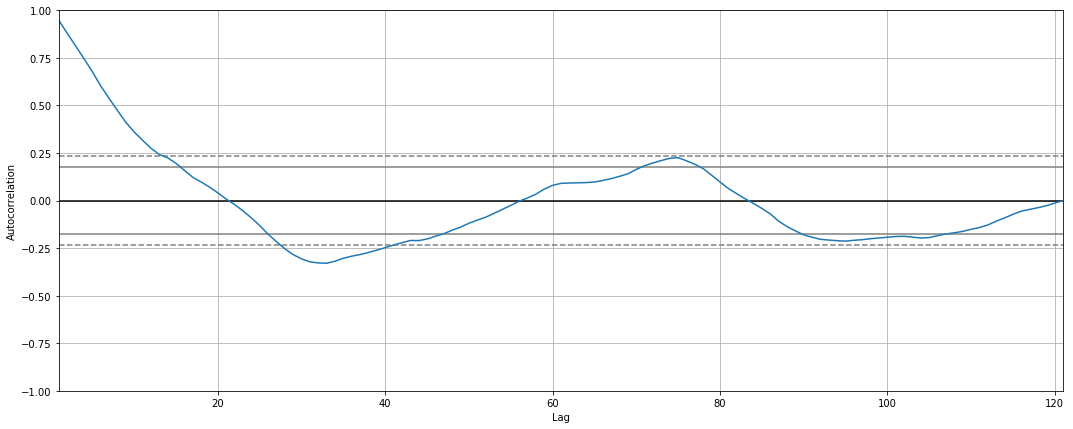

In [31]:
pd.plotting.autocorrelation_plot(dfidx['Open Price'].resample('1m').mean())

## ACF and PACF plots:

    1)Running the example creates a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1.
    2)Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
    3)acf: By looking at the plot we can improvise our understanding from above plot and say that present value depends on previous 100-150 values.
    4)pacf plot further says that present value depends only on previous 1-2 values. All these plots help us narrow down thinking and make our model efficient.

In [32]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

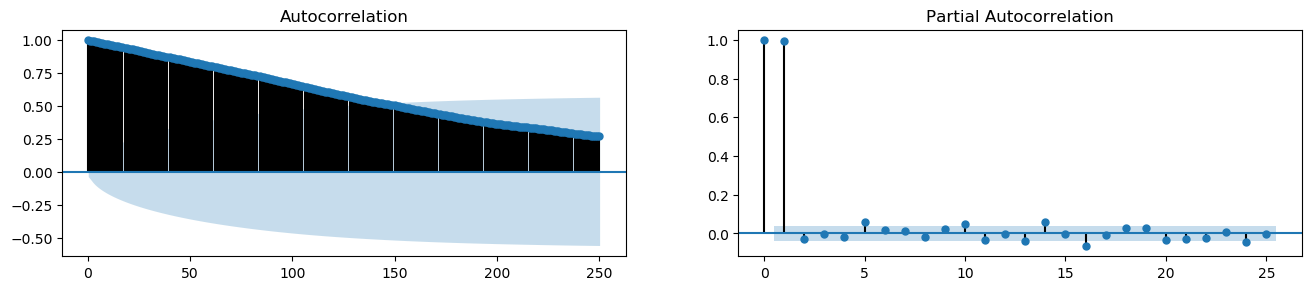

In [34]:
#PLots
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dfidx['Open Price'],lags=250,ax=axes[0])
plot_pacf(dfidx['Open Price'],lags=25,ax=axes[1])
plt.show()

## Auto ARIMA

In [36]:
import pmdarima as pm

In [128]:
model1=pm.auto_arima(dfidx['Open Price'],m=20,seasonal=True,start_p=0,start_q=0,max_order=4,test='adf',error_action='ignore',
                   suppress_warning=True,stepwise=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[20] intercept   : AIC=9493.530, Time=2.90 sec
 ARIMA(0,1,0)(0,0,0)[20] intercept   : AIC=9497.789, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[20] intercept   : AIC=9497.933, Time=1.49 sec
 ARIMA(0,1,1)(0,0,1)[20] intercept   : AIC=9497.627, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[20]             : AIC=9496.582, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[20] intercept   : AIC=9497.005, Time=0.96 sec
 ARIMA(0,1,0)(1,0,0)[20] intercept   : AIC=9497.297, Time=1.34 sec
 ARIMA(0,1,0)(2,0,1)[20] intercept   : AIC=9493.181, Time=19.07 sec
 ARIMA(0,1,0)(2,0,0)[20] intercept   : AIC=9492.582, Time=9.54 sec
 ARIMA(1,1,0)(2,0,0)[20] intercept   : AIC=9493.217, Time=11.37 sec
 ARIMA(0,1,1)(2,0,0)[20] intercept   : AIC=9493.229, Time=11.62 sec
 ARIMA(1,1,1)(2,0,0)[20] intercept   : AIC=9495.217, Time=13.79 sec
 ARIMA(0,1,0)(2,0,0)[20]             : AIC=9491.411, Time=1.47 sec
 ARIMA(0,1,0)(1,0,0)[20]             : AIC=9496.037, Time=0.35 sec
 ARIMA(0,1,0)(2

In [130]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2480
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 20)   Log Likelihood               -4742.705
Date:                            Wed, 02 Dec 2020   AIC                           9491.411
Time:                                    00:45:33   BIC                           9508.858
Sample:                                         0   HQIC                          9497.748
                                           - 2480                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L20       0.0338      0.015      2.199      0.028       0.004       0.064
ar.S.L40      -0.0531      0.016     -3.229      0.001      -0.085      -0.021
sigma2         2.6868      0.031     86.278      0.000       2.626       2.748
===================================================================================
Ljung-Box (Q):                       57.01   Jarque-Bera (JB):             11698.04
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Split tha data into train and test set


In [142]:
train=dfidx[:2470]
test=dfidx[2470:]

In [143]:
model1.fit(train['Open Price'])

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 0, 0, 20),
      with_intercept=False)

In [144]:
forecast=model1.predict(n_periods=len(test),return_conf_int=True)

In [145]:
forecast_data=pd.DataFrame(forecast[0],index=test.index,columns=['Prediction'])

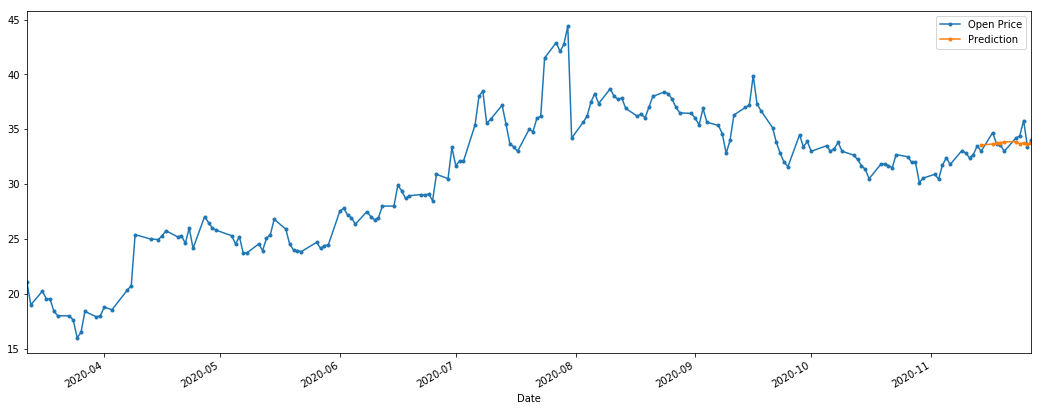

In [147]:
pd.concat([dfidx['Open Price'],forecast_data],axis=1)[2300:].plot(marker='.')

In above plot we predict the last 10 points based of training data and we see that the prediction is not so bad.It shows the stock price is constant in next 10 days but actually data shows data it is not constant.Hence we may use these forecast on our own risk

## An Approach to check how correct is our model

    1)Making a list for training data
    2)The model will predict next day's stock value with this data.
    3)Later the corresponding test value is appended to training data and next day's value is predicted again. This is repeated for all the test data and plotted
From AutoArima, we have already got the parameters--> p,d,q.Using it directly on ARIMA model

In [113]:
from statsmodels.tsa.arima_model import ARIMA

In [152]:
train=dfidx[:2400]
test=dfidx[2400:]
train2=[x for x in train['Open Price']]
test2=[x for x in test['Open Price']]

In [153]:
prediction=[]
lower_b=[]
upper_b=[]

for s in range(len(test2)):
    model=ARIMA(train2,order=(0,1,0))
    fit=model.fit(disp=0)
    result=fit.forecast()
    
    yhat=result[0]
    lower=result[2][0][0]  # lower bound for 95 % confidence interval for predicted value
    upper=result[2][0][1]  # upper bound for 95 % confidence interval for predicted value
    prediction.append(yhat)
    lower_b.append(lower)
    upper_b.append(upper)
    train2.append(test2[s])  # taking t_th data from test as 'obs' and appending it in 'train2' list which is used for training
    

C:\Users\ANIL\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ANIL\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ANIL\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ANIL\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ANIL\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_

In [154]:
from sklearn import metrics
error=metrics.mean_squared_error(prediction,test2)
print('Test MSE:%.3f'%error)

Test MSE:1.048


In [155]:
error=metrics.mean_absolute_error(prediction,test2)
print('Test MSE:%.3f'%error)

Test MSE:0.798


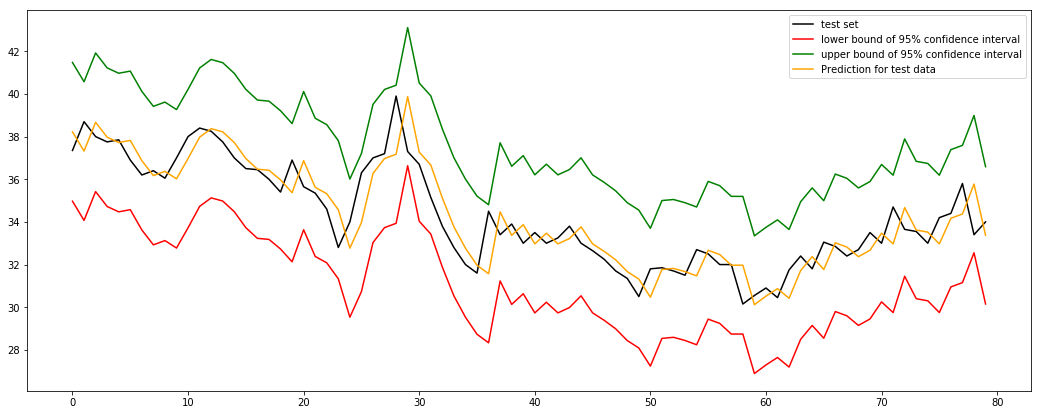

In [156]:
plt.plot(test2,color='black',label='test set')
plt.plot(lower_b,color='red',label='lower bound of 95% confidence interval')
plt.plot(upper_b,color='green',label='upper bound of 95% confidence interval')
plt.plot(prediction,color='orange',label='Prediction for test data')
plt.legend()
plt.show()

The test mean squared error is 1.048 and mean absolute error is 0.798. which is quite good and also from above plot we see that model is good fit for given dataset.Hence we may use these model for further forecasting

## Conclusion:

    From all above analysis we may conclude that,
    1)In above we may fit various models and finally see that ARIMA(0,1,0) is good fit for these dataset
    2)In above we see that there is seasonal variation in present dataset.we see that stock price is comming down on every 7 month time perid.Hence who can interested they can buy stock starting of every year and sell in the middle of every year to make good profit